In [321]:
import networkx as nx
from EoN import Gillespie_simple_contagion as gsp_alg
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import time

In [377]:
#G = nx.erdos_renyi_graph(n=10000, p=0.001)
G = nx.complete_graph(500)
# initial conditions
IC = defaultdict(lambda: 'V')
for node in range(1):
    IC[node] = 'B'
for node in range(2, 3):
    IC[node] = 'C'

In [382]:
return_statuses = ('V', 'B', 'W_B', 'C_B', 'C', 'W', 'P')

# setup of the parameters
params = {}

beta = 1.1/499
epsilon = 10000

params['betaB'] = beta
params['betaW'] = beta
params['gammaP'] = 0.2
params['epsilon'] = epsilon
params['epsilonB'] = epsilon
params['mu'] = 1
params['muB'] = 1


#initiliaze spontaneous transition network

nodes = ['V', 'C', 'W', 'B', 'C_W', 'W_B', 'P']
edges = [
    ('C_B', 'P', {'rate': params['gammaP']}), ('C', 'P', {'rate': params['gammaP']}), #user update prompted
    ('W_B', 'P', {'rate': params['muB']}), ('W', 'P', {'rate': params['mu']}), #the worm updates 
    ('C', 'W', {'rate':params['epsilon']}), ('C_B', 'W_B', {'rate':params['epsilonB']}) # white worm gets active
        ]

sp_proc = nx.DiGraph()
sp_proc.add_nodes_from(nodes)
sp_proc.add_edges_from(edges)

# initialize induced transition network

nodes = [
    ('B', 'V'), ('B', 'B'), ('C_B', 'V'), ('C_B', 'B'), ('W_B', 'V'), ('W_B', 'B'),  # Transition from vulnerable to black infected
    ('W', 'V'), ('W', 'C'), ('W_B', 'V'), ('W_B', 'C'), # Transition from vulnerable to "cautious"
    ('W', 'B'), ('W', 'C_B'), ('W_B', 'B'), ('W_B', 'C_B'), # Transition from black infected to "cautious"+black infected
    ('B', 'C'), ('B', 'C_B'), ('C_B', 'C'), ('C_B', 'C_B'), ('W_B', 'C'), ('W_B', 'C_B'), # Transition from cautious to cautious+black infected
    ('B', 'W'), ('B', 'W_B'), ('C_B', 'W'), ('C_B', 'W_B'), ('W_B', 'W'), ('W_B', 'W_B') # Transition from White infected to double infected
        ]

edges = [
    (nodes[0], nodes[1], {'rate':params['betaB']}), 
    (nodes[2], nodes[3], {'rate':params['betaB']}),
    (nodes[4], nodes[5], {'rate':params['betaB']}),
    (nodes[6], nodes[7], {'rate':params['betaW']}),
    (nodes[8], nodes[9], {'rate':params['betaW']}),
    (nodes[10], nodes[11], {'rate':params['betaW']}),
    (nodes[12], nodes[13], {'rate':params['betaW']}),
    (nodes[14], nodes[15], {'rate':params['betaB']}), 
    (nodes[16], nodes[17], {'rate':params['betaB']}),
    (nodes[18], nodes[19], {'rate':params['betaB']}),
    (nodes[20], nodes[21], {'rate':params['betaB']}), 
    (nodes[22], nodes[23], {'rate':params['betaB']}),
    (nodes[24], nodes[25], {'rate':params['betaB']})
         ]

ind_proc = nx.DiGraph()
ind_proc.add_nodes_from(nodes)
ind_proc.add_edges_from(edges)
t0 = time.time()
t, V, B, W_B, C_B, C, W, P  = gsp_alg(G, sp_proc, ind_proc, IC, return_statuses,
                                    tmax = 100)
t1 = time.time()



In [388]:
N = len(G.nodes)
np.where(B/N>0.5,)[0]

array([252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
       382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407,
       408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
       421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 43

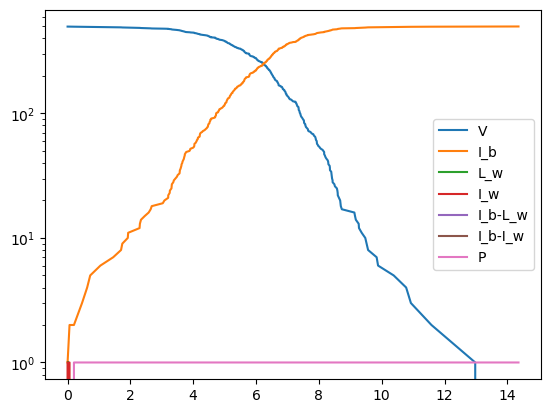

In [383]:
plt.plot(t, V, label = 'V')
plt.plot(t, B, label = 'I_b')
plt.plot(t, C, label = 'L_w')
plt.plot(t, W, label = 'I_w')
plt.plot(t, C_B, label = 'I_b-L_w')
plt.plot(t, W_B, label = 'I_b-I_w')
plt.plot(t, P, label = 'P')
plt.yscale("log")
plt.legend()

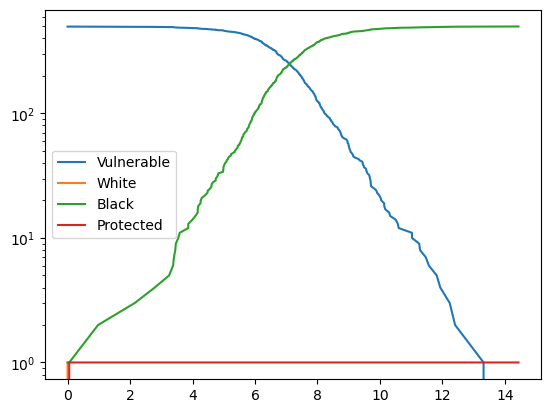

In [376]:
plt.semilogy(t, V, label = 'Vulnerable')
plt.semilogy(t, C+W+W_B+C_B, label = 'White')
plt.semilogy(t, B+W_B+C_B, label = 'Black')
plt.semilogy(t, P, label = 'Protected')
plt.legend()

In [119]:
returns = (V, B, W_B, C_B, C, W, P)

In [117]:
{key : returns[i] for i, key in enumerate(return_statuses)}

{'V': array([0.00000000e+00, 2.66974801e-05, 3.90242517e-05, ...,
        1.69579692e+01, 1.84424465e+01, 2.10478146e+01]),
 'B': array([101, 101, 101, ...,   0,   0,   0]),
 'W_B': array([200, 199, 198, ...,   0,   0,   0]),
 'C_B': array([0, 0, 0, ..., 2, 1, 0]),
 'C': array([0, 1, 2, ..., 0, 0, 0]),
 'W': array([0, 0, 0, ..., 0, 0, 0]),
 'P': array([199, 199, 199, ...,   0,   0,   0])}

In [112]:
import pandas as pd

In [120]:
dict_returns = {key : returns[i] for i, key in enumerate(return_statuses)}
dict_returns['t'] = t
df = pd.DataFrame.from_dict(dict_returns, orient='index').T.to_csv(f'results.csv', index=False)

In [197]:
betas = np.linspace(0.1, 1, 10)
peak_black = np.zeros(10)
for i in range(10):
    for k in range(20):
        params['betaB'] = betas[i]
        params['betaW'] = betas[i]
        #initiliaze spontaneous transition network

        nodes = ['V', 'C', 'W', 'B', 'C_W', 'W_B', 'P']
        edges = [
            ('V', 'P', {'rate': params['gamma0']}), ('B', 'P', {'rate': params['gamma0']}), # user updates autonomously
            ('C_B', 'P', {'rate': params['gammaP']}), ('C', 'P', {'rate': params['gammaP']}), #user update prompted
            ('W_B', 'P', {'rate': params['gammaP']+params['muB']}), ('W', 'P', {'rate': params['gammaP']+params['mu']}), #user update prompted or the worm updates 
            ('C', 'W', {'rate':params['epsilon']}), ('C_B', 'W_B', {'rate':params['epsilonB']}) # white worm gets active
                ]

        sp_proc = nx.DiGraph()
        sp_proc.add_nodes_from(nodes)
        sp_proc.add_edges_from(edges)
        
        # initialize induced transition network

        nodes = [
            ('B', 'V'), ('B', 'B'), ('C_B', 'V'), ('C_B', 'B'), ('W_B', 'V'), ('W_B', 'B'),  # Transition from vulnerable to black infected
            ('W', 'V'), ('W', 'C'), ('W_B', 'V'), ('W_B', 'C'), # Transition from vulnerable to "cautious"
            ('W', 'B'), ('W', 'C_B'), ('W_B', 'B'), ('W_B', 'C_B'), # Transition from black infected to "cautious"+black infected
            ('B', 'C'), ('B', 'C_B'), ('C_B', 'C'), ('C_B', 'C_B'), ('W_B', 'C'), ('W_B', 'C_B'), # Transition from cautious to cautious+black infected
            ('B', 'W'), ('B', 'W_B'), ('C_B', 'W'), ('C_B', 'W_B'), ('W_B', 'W'), ('W_B', 'W_B') # Transition from White infected to double infected
                ]

        edges = [
            (nodes[0], nodes[1], {'rate':params['betaB']}), 
            (nodes[2], nodes[3], {'rate':params['betaB']}),
            (nodes[4], nodes[5], {'rate':params['betaB']}),
            (nodes[6], nodes[7], {'rate':params['betaW']}),
            (nodes[8], nodes[9], {'rate':params['betaW']}),
            (nodes[10], nodes[11], {'rate':params['betaW']}),
            (nodes[12], nodes[13], {'rate':params['betaW']}),
            (nodes[14], nodes[15], {'rate':params['betaB']}), 
            (nodes[16], nodes[17], {'rate':params['betaB']}),
            (nodes[18], nodes[19], {'rate':params['betaB']}),
            (nodes[20], nodes[21], {'rate':params['betaB']}), 
            (nodes[22], nodes[23], {'rate':params['betaB']}),
            (nodes[24], nodes[25], {'rate':params['betaB']})
                 ]

        ind_proc = nx.DiGraph()
        ind_proc.add_nodes_from(nodes)
        ind_proc.add_edges_from(edges)

        t, V, B, W_B, C_B, C, W, P  = gsp_alg(G, sp_proc, ind_proc, IC, return_statuses,
                                            tmax = float('Inf'))
        peak_black[i] += np.max(B+W_B+C_B)
    peak_black[i] /= 20

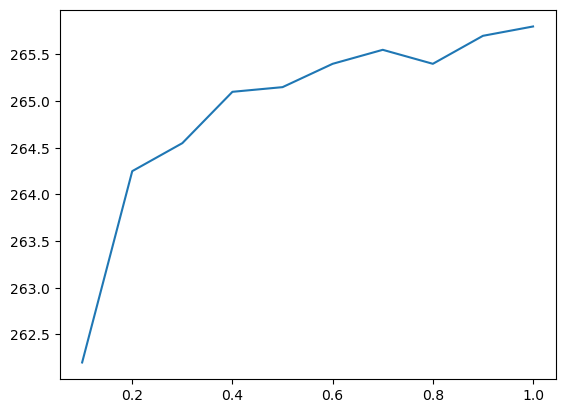

In [198]:
plt.plot(betas, peak_black)

In [201]:
betas = np.logspace(-5, 0, 10)
peak_black = np.zeros(10)
for i in range(10):
    for k in range(10):
        params['betaB'] = betas[i]
        params['betaW'] = betas[i]
        #initiliaze spontaneous transition network

        nodes = ['V', 'C', 'W', 'B', 'C_W', 'W_B', 'P']
        edges = [
            ('V', 'P', {'rate': params['gamma0']}), ('B', 'P', {'rate': params['gamma0']}), # user updates autonomously
            ('C_B', 'P', {'rate': params['gammaP']}), ('C', 'P', {'rate': params['gammaP']}), #user update prompted
            ('W_B', 'P', {'rate': params['gammaP']+params['muB']}), ('W', 'P', {'rate': params['gammaP']+params['mu']}), #user update prompted or the worm updates 
            ('C', 'W', {'rate':params['epsilon']}), ('C_B', 'W_B', {'rate':params['epsilonB']}) # white worm gets active
                ]

        sp_proc = nx.DiGraph()
        sp_proc.add_nodes_from(nodes)
        sp_proc.add_edges_from(edges)
        
        # initialize induced transition network

        nodes = [
            ('B', 'V'), ('B', 'B'), ('C_B', 'V'), ('C_B', 'B'), ('W_B', 'V'), ('W_B', 'B'),  # Transition from vulnerable to black infected
            ('W', 'V'), ('W', 'C'), ('W_B', 'V'), ('W_B', 'C'), # Transition from vulnerable to "cautious"
            ('W', 'B'), ('W', 'C_B'), ('W_B', 'B'), ('W_B', 'C_B'), # Transition from black infected to "cautious"+black infected
            ('B', 'C'), ('B', 'C_B'), ('C_B', 'C'), ('C_B', 'C_B'), ('W_B', 'C'), ('W_B', 'C_B'), # Transition from cautious to cautious+black infected
            ('B', 'W'), ('B', 'W_B'), ('C_B', 'W'), ('C_B', 'W_B'), ('W_B', 'W'), ('W_B', 'W_B') # Transition from White infected to double infected
                ]

        edges = [
            (nodes[0], nodes[1], {'rate':params['betaB']}), 
            (nodes[2], nodes[3], {'rate':params['betaB']}),
            (nodes[4], nodes[5], {'rate':params['betaB']}),
            (nodes[6], nodes[7], {'rate':params['betaW']}),
            (nodes[8], nodes[9], {'rate':params['betaW']}),
            (nodes[10], nodes[11], {'rate':params['betaW']}),
            (nodes[12], nodes[13], {'rate':params['betaW']}),
            (nodes[14], nodes[15], {'rate':params['betaB']}), 
            (nodes[16], nodes[17], {'rate':params['betaB']}),
            (nodes[18], nodes[19], {'rate':params['betaB']}),
            (nodes[20], nodes[21], {'rate':params['betaB']}), 
            (nodes[22], nodes[23], {'rate':params['betaB']}),
            (nodes[24], nodes[25], {'rate':params['betaB']})
                 ]

        ind_proc = nx.DiGraph()
        ind_proc.add_nodes_from(nodes)
        ind_proc.add_edges_from(edges)

        t, V, B, W_B, C_B, C, W, P  = gsp_alg(G, sp_proc, ind_proc, IC, return_statuses,
                                            tmax = float('Inf'))
        peak_black[i] += np.max(B+W_B+C_B)
    peak_black[i] /= 10

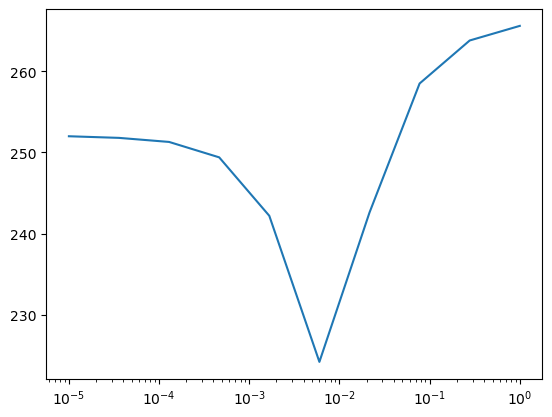

In [202]:
plt.semilogx(betas, peak_black)

In [214]:
filename = 'network.txt'
graphtype = nx.Graph()   # use net.Graph() for undirected graph

# change float to int.
G = nx.read_edgelist(
    filename, 
    create_using=graphtype,
    delimiter=', ',
    nodetype=int
)
